In [2]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import scipy as sp
from scipy.optimize import curve_fit


from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
import matplotlib.gridspec as gridspec
import matplotlib.colors as colors
from scipy.stats import norm

In [3]:
log10_axion_ac, log10_fraction_axion_ac, omega_cdm, H0, Djs = np.loadtxt('/Users/saravannah/Axion-MCMC/axion_MCMC/Aug_18_test/vary_ac_fEDE_wCDM_n=3_8-18.txt', unpack = True)
#np.loadtxt('/Users/saravannah/Axion-MCMC/axion_MCMC/vary_ac_fEDE_wCDM.txt', unpack = True)

In [4]:
#params = {'log10_axion_ac':0, 'log10_fraction_axion_ac':1, 'omega_cdm':2, 'H0':3}
params = [10**log10_fraction_axion_ac,log10_axion_ac, H0, omega_cdm ]#[log10_axion_ac, log10_fraction_axion_ac, omega_cdm, H0]
par_names = ['fEDE(a_c)', 'log_10(a_c)', 'H0', 'omega_CDM']#['log10_axion_ac', 'log10_fraction_axion_ac', 'omega_cdm', 'H0']

In [5]:
#taken from https://www.geeksforgeeks.org/python-program-for-bubble-sort/
#use bubble sort to order array
def bubbleSort(arr):
    n = len(arr)
  
    # Traverse through all array elements
    for i in range(n-1):
    # range(n) also work but outer loop will repeat one time more than needed.
  
        # Last i elements are already in place
        for j in range(0, n-i-1):
  
            # traverse the array from 0 to n-i-1
            # Swap if the element found is greater
            # than the next element
            if arr[j] > arr[j + 1] :
                arr[j], arr[j + 1] = arr[j + 1], arr[j]

In [6]:
def gaussian(x, A, mu, sigma):
    return A*np.exp(-(x-mu)**2/(2*sigma**2))

In [7]:
def get_gauss(x, y, param_guesses):
    
    pars, cov =  curve_fit(f=gaussian, xdata=x, ydata=y, p0=param_guesses, bounds=(-np.inf, np.inf))
    # Get the standard deviations of the parameters (square roots of the # diagonal of the covariance)
    stdevs = np.sqrt(np.diag(cov))
    
    return pars, stdevs

In [8]:
mus = np.zeros(len(params))
sigmas = np.zeros(len(params))
for _ in range(len(params)):
    mus[_], sigmas[_] = norm.fit(params[_])


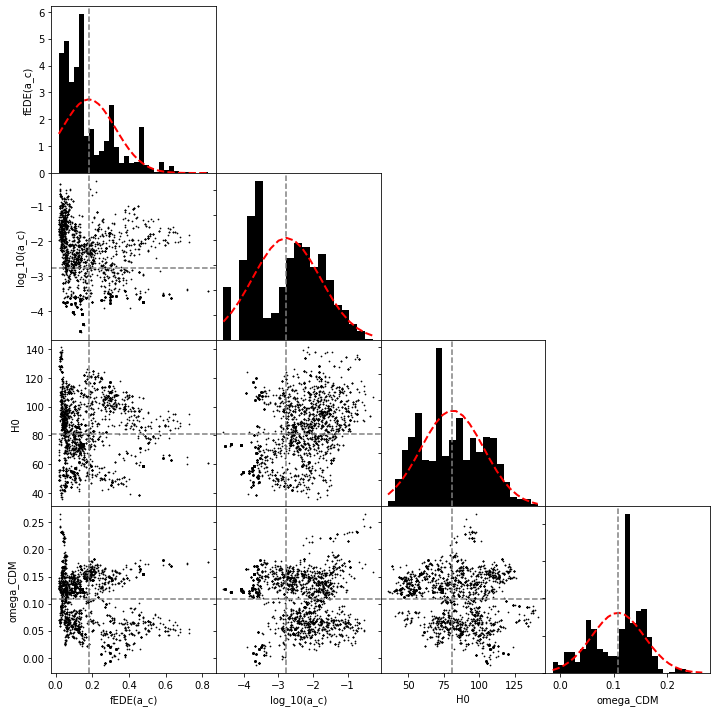

In [9]:
fig, axs = plt.subplots(4,4, figsize=(10,10), gridspec_kw = {'wspace':0, 'hspace':0})


cmap = plt.get_cmap('PiYG')
norm = colors.SymLogNorm(linthresh=1e-4, linscale=1e-4,vmin=0.0, vmax=2) #BoundaryNorm(levels, ncolors=cmap.N, clip=True)

for rows in range(len(params)):
    for cols in range(len(params)):
        if rows == cols:
            #axs[rows,cols].scatter(params[rows], Djs)
            n, bins, patches = axs[rows,cols].hist(params[rows], bins='auto', density=1, color='black')
            y = sp.stats.norm.pdf(bins, mus[rows], sigmas[rows])
            l = axs[rows,cols].plot(bins, y, 'r--', linewidth=2)
            axs[rows,cols].axvline(x=mus[cols], linestyle='dashed', color='gray')
            
        if cols < rows:
            #infuriatingly, the (x,y) for subplots is backwards - it's (rows, cols) or (y,x)
            axs[rows,cols].scatter(params[cols], params[rows], color='black', s=0.5)
            
            axs[rows,cols].axvline(x=mus[cols], linestyle='dashed', color='gray')
            axs[rows,cols].axhline(y=mus[rows], linestyle='dashed', color='gray')
            
        if cols > rows:
            axs[rows][cols].axis('off')

for rows in range(len(params)):
    for cols in range(len(params)):
        if cols == 0:
            axs[rows,cols].set_ylabel(par_names[rows])
        if rows == 3:
            axs[rows,cols].set_xlabel(par_names[cols])
        if cols > 0:
            axs[rows,cols].set_yticklabels([])
        if rows < 3: 
            axs[rows,cols].set_xticklabels([])
            
#fig.colorbar(im, ax=axs[2][3])           
plt.tight_layout()

#plt.savefig('n=3_triangle_v1.png')

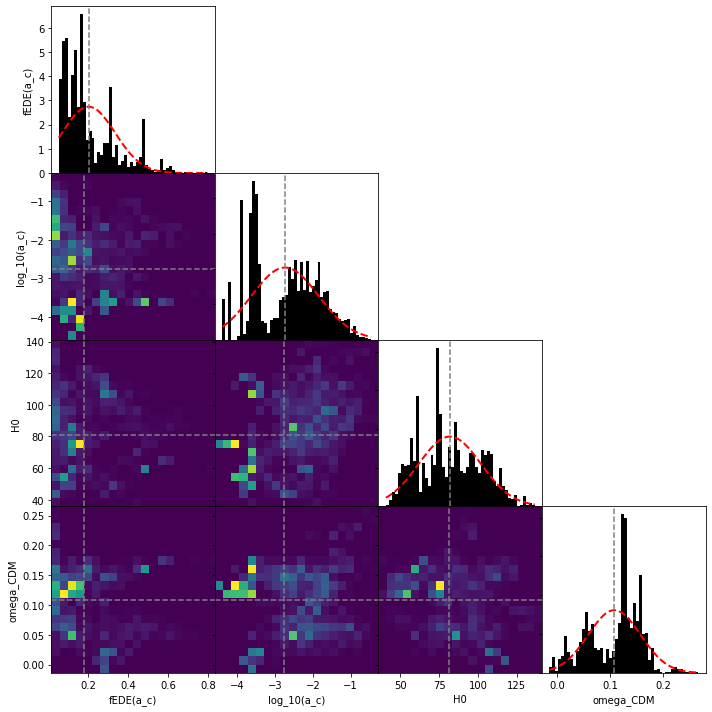

In [10]:
fig, axs = plt.subplots(4,4, figsize=(10,10), gridspec_kw = {'wspace':0, 'hspace':0})


cmap = plt.get_cmap('PiYG')
norm = colors.SymLogNorm(linthresh=1e-4, linscale=1e-4,vmin=0.0, vmax=2) #BoundaryNorm(levels, ncolors=cmap.N, clip=True)

for rows in range(len(params)):
    for cols in range(len(params)):
        if rows == cols:
            #axs[rows,cols].scatter(params[rows], Djs)
            n, bins, patches = axs[rows,cols].hist(params[rows], bins=50, density=1, color='black')
            y = sp.stats.norm.pdf(bins, mus[rows], sigmas[rows])
            l = axs[rows,cols].plot(bins, y, 'r--', linewidth=2)
            axs[rows,cols].axvline(x=mus[cols], linestyle='dashed', color='gray')
            
        if cols < rows:
            #infuriatingly, the (x,y) for subplots is backwards - it's (rows, cols) or (y,x)
            axs[rows,cols].hist2d(params[cols], params[rows], bins=(20,20))
            
            axs[rows,cols].axvline(x=mus[cols], linestyle='dashed', color='gray')
            axs[rows,cols].axhline(y=mus[rows], linestyle='dashed', color='gray')
            
        if cols > rows:
            axs[rows][cols].axis('off')

for rows in range(len(params)):
    for cols in range(len(params)):
        if cols == 0:
            axs[rows,cols].set_ylabel(par_names[rows])
        if rows == 3:
            axs[rows,cols].set_xlabel(par_names[cols])
        if cols > 0:
            axs[rows,cols].set_yticklabels([])
        if rows < 3: 
            axs[rows,cols].set_xticklabels([])
            
#fig.colorbar(im, ax=axs[2][3])           
plt.tight_layout()

In [11]:
arr = np.array([params[0], params[1]], np.int32)
print(arr.shape)
arr.shape[1]

(2, 3234)


3234

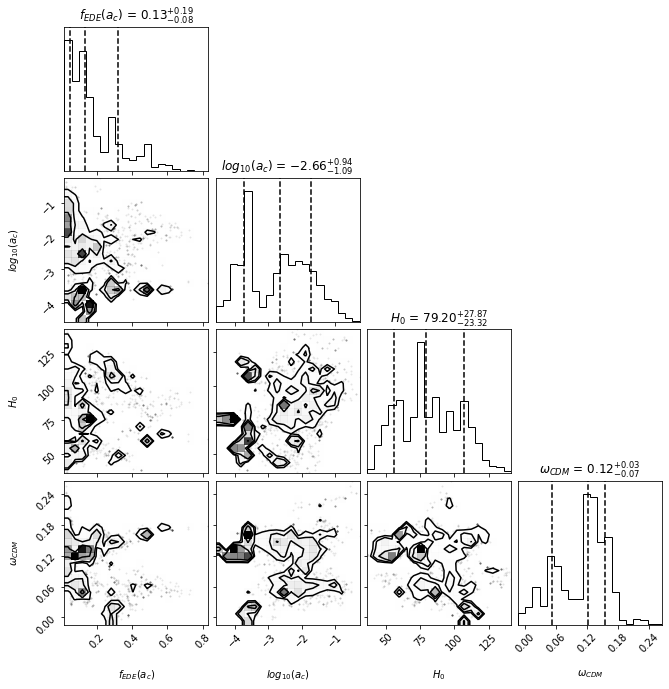

In [12]:
#import pyhdust.triangle as tri
import corner


ndim, nsamples = len(par_names), len(params[0])

samples = np.array(params)

samples = samples.T

np.random.seed(42)
test = np.random.randn(ndim * nsamples).reshape([nsamples, ndim])

#samples = samples.reshape([nsamples, ndim])
figure = corner.corner(samples, 
                       labels=[r"$f_{EDE}(a_c)$", r"$log_{10}(a_c)$", r"$H_0$", r"$\omega _{CDM}$"], 
                      quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 12})
#tri.corner(test)



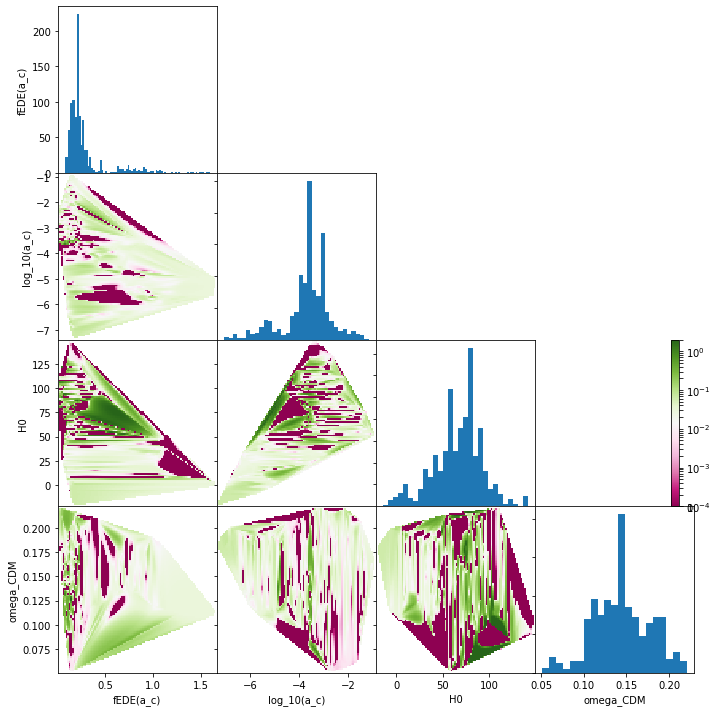

In [12]:
fig, axs = plt.subplots(4,4, figsize=(10,10), gridspec_kw = {'wspace':0, 'hspace':0})


cmap = plt.get_cmap('PiYG')
norm = colors.SymLogNorm(linthresh=1e-4, linscale=1e-4,vmin=0.0, vmax=2) #BoundaryNorm(levels, ncolors=cmap.N, clip=True)

for rows in range(len(params)):
    for cols in range(len(params)):
        if rows == cols:
            #axs[rows,cols].scatter(params[rows], Djs)
            axs[rows,cols].hist(params[rows], bins='auto')
        if cols < rows:
            #infuriatingly, the (x,y) for subplots is backwards - it's (rows, cols) or (y,x)
            #axs[rows,cols].scatter(params[cols], params[rows], c=Djs)
            
            x, y, z = params[cols], params[rows], Djs
            grid_x, grid_y = np.mgrid[min(x):max(x):100j, min(y):max(y):100j]
            grid_z = griddata((x, y), z, (grid_x, grid_y), method='cubic')

            im = axs[rows][cols].pcolormesh(grid_x, grid_y, grid_z, cmap=cmap, norm=norm, shading='auto')
            
        if cols > rows:
            axs[rows][cols].axis('off')

for rows in range(len(params)):
    for cols in range(len(params)):
        if cols == 0:
            axs[rows,cols].set_ylabel(par_names[rows])
        if rows == 3:
            axs[rows,cols].set_xlabel(par_names[cols])
        if cols > 0:
            axs[rows,cols].set_yticklabels([])
        if rows < 3: 
            axs[rows,cols].set_xticklabels([])
            
fig.colorbar(im, ax=axs[2][3])           
plt.tight_layout()

#plt.savefig('first_triangle_plot.png')

In [14]:
#borrowed from analysis code written for first paper
#this is to mesh the data


#data manipulation to decrease number of points
#fewer points = less computationally intensive interpolation

#distance between two points
def dist(x1,y1,z1, x2, y2, z2):
    return np.sqrt((x1-x2)**2+(y1-y2)**2+(z1-z2)**2)
#arrays for X, Y, Z (w0, wa, JSD), and int minimum distance between points
def reduc_arr(X_arr, Y_arr, Z_arr, min_dist):
    #abbreviated arrays of points
    X_new = [X_arr[1]]
    Y_new = [Y_arr[1]]
    Z_new = [Z_arr[1]]
    for i in range(len(X_arr)): 
        point_nearby = False
        for j in range(len(X_new)):
            #check if there's another point nearby
            if dist(X_arr[i], Y_arr[i], Z_arr[i], X_new[j], Y_new[j], Z_new[j]) < min_dist:
                point_nearby = True  
        #also removing the absurd wa tail
        if not point_nearby and Y_arr[i] > -1.0:# and Z_arr[i] < 1e-2:
            #no point already saved nearby, so save the point
            X_new.append(X_arr[i])
            Y_new.append(Y_arr[i])
            Z_new.append(Z_arr[i])
    return X_new, Y_new, Z_new
